# Лабораторная 1

### Выполнил студент группы 18-ИВТ-2 Васильев Кирилл Николаевич

#### Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации. Задание: 4 вариант - Дожди в Индии:

1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.
2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.
3. Постройте графики количества осадков по штатам, используйте boxplot.Сделайте выводы по построенным графикам.
4. Определите штаты, для которых количество осадков минимально и максимально.
5. Выведите уникальные имена штатов и территорий Индии.
6. Определите количество лет наблюдений для каждого штата.
7. Определите штат с наименьшим количеством наблюдений
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.
9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


========================================================================================================================

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
%matplotlib inline

In [5]:
rain_data = pd.read_csv('rainfall in india 1901-2015.csv')
rain_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [8]:
rain_data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

========================================================================================================================

### 1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.

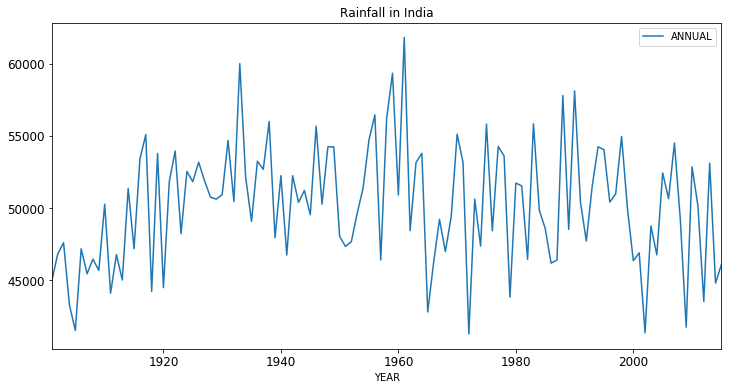

In [43]:
rain_data.groupby(by='YEAR')[['ANNUAL']].sum().plot(figsize=(12, 6), title='Rainfall in India', fontsize=12)

### 2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.

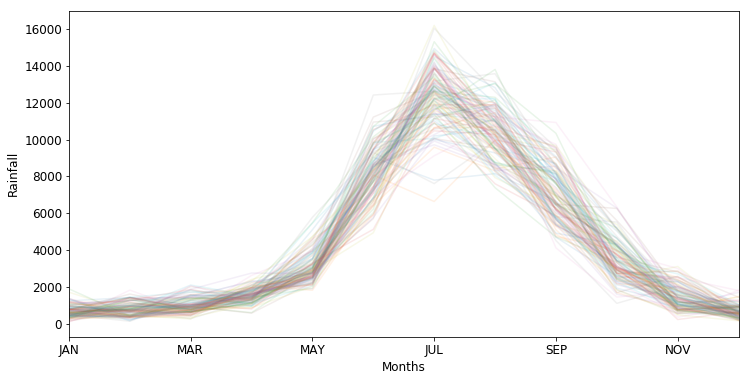

In [37]:
drop_col = ['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'] 
 
fig, ax = plt.subplots() 
 
(rain_data.groupby(by='YEAR').sum().drop(drop_col, axis=1).T.plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax)) 
 
ax.set_xlabel('Months', fontsize=12) 
ax.set_ylabel('Rainfall', fontsize=12)

#### Вывод: самое большое число осадков наблюдается в Июле

### 3. Постройте графики количества осадков по штатам, используйте boxplot.Сделайте выводы по построенным графикам.

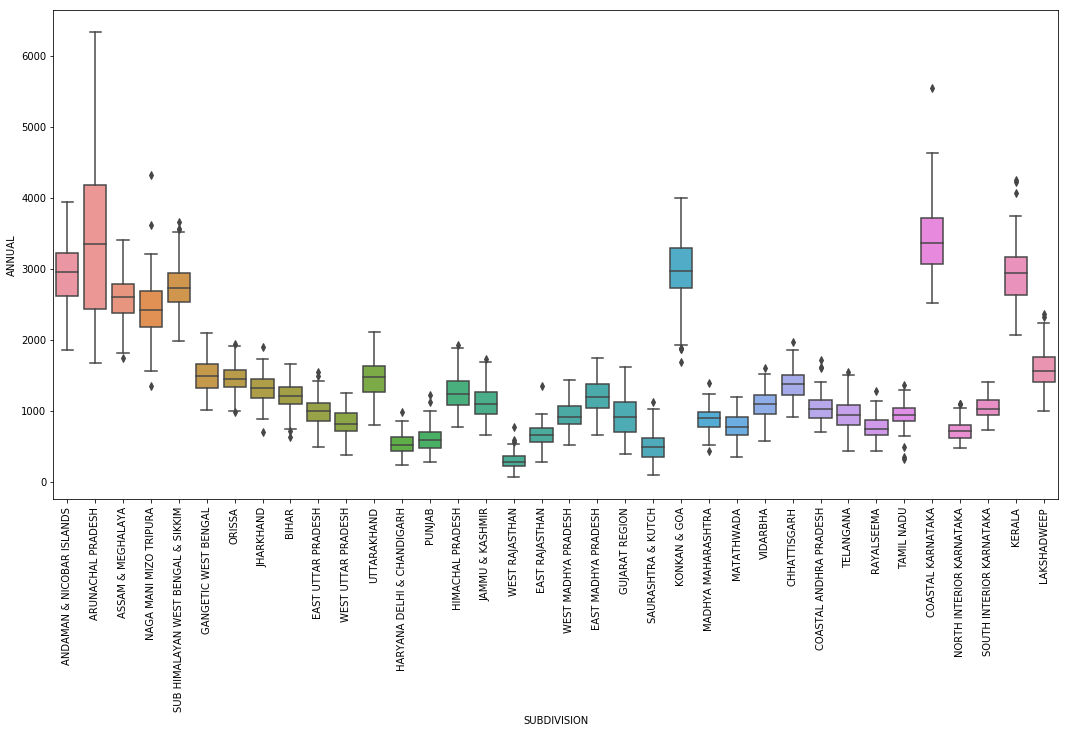

In [36]:
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical') 
sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=rain_data)

### 4. Определите штаты, для которых количество осадков минимально и максимально.

In [57]:
print('Min in:', 
      rain_data.groupby(by='SUBDIVISION')[['ANNUAL']].
      sum().sort_values(by='ANNUAL').
      index[0])
print('Max in:', rain_data.groupby(by='SUBDIVISION')[['ANNUAL']].
      sum().sort_values(by='ANNUAL').
      index[-1])

Min in: WEST RAJASTHAN
Max in: COASTAL KARNATAKA


### 5. Выведите уникальные имена штатов и территорий Индии.

In [15]:
print(rain_data['SUBDIVISION'].unique())

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


In [30]:
print('Количество уникальных штатов и территорий в Индии :', 
      rain_data['SUBDIVISION'].unique().size)

Количество уникальных штатов и территорий в Индии : 36


### 6. Определите количество лет наблюдений для каждого штата.

In [39]:
rain_data.groupby(by='SUBDIVISION')[['YEAR']].count()

,YEAR
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,110
ARUNACHAL PRADESH,97
ASSAM & MEGHALAYA,115
BIHAR,115
CHHATTISGARH,115
COASTAL ANDHRA PRADESH,115
COASTAL KARNATAKA,115
EAST MADHYA PRADESH,115
EAST RAJASTHAN,115


### 7. Определите штат с наименьшим количеством наблюдений

In [33]:
print('Наименьшее количество наблюдений в :', 
      rain_data.groupby(by='SUBDIVISION')[['YEAR']].count()
      .sort_values(by='YEAR').index[0])

Наименьшее количество наблюдений в : ARUNACHAL PRADESH


### 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [77]:
rain_data['Jan-May'] = rain_data['Jan-Feb'] + rain_data['Mar-May']
rain_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Jan-May
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,696.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,618.1
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,392.8
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,531.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,311.0


### 9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [11]:
pears = pearsonr(rain_data['MAR'],rain_data['NOV'])
spearm = spearmanr(rain_data['MAR'],rain_data['NOV'])
print("Коэффициент корреляции Пирсона:", pears)
print("Коэффициент корреляции Спирмена:", spearm)
                          
if (spearm[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Коэффициент корреляции Пирсона: (nan, 1.0)
Коэффициент корреляции Спирмена: SpearmanrResult(correlation=nan, pvalue=nan)
p-value is not good


F:\Лабы\Гай\EeOneGuy\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
F:\Лабы\Гай\EeOneGuy\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\scipy\stats\mstats_basic.py:484: RuntimeWarning: overflow encountered in long_scalars
  denom = n*(n**2 - 1)/6.


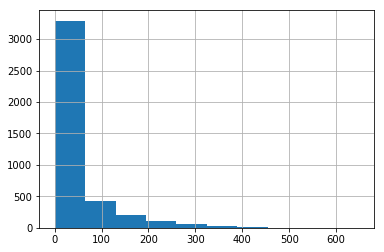

In [7]:
rain_data['NOV'].hist()

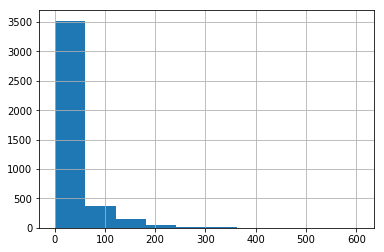

In [6]:
rain_data['MAR'].hist()